In [1]:
import cv2
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

In [2]:
train_path = ('C:/Users/Reza/miniconda3/envs/LatihanCV/Dataset')
training_names = os.listdir(train_path) #dataset 3

image_paths = []
image_classes = []
class_id = 0

def imglist(path):    
    return [os.path.join(path, f) for f in os.listdir(path)]

for training_name in training_names:
    dir = os.path.join(train_path, training_name) # Menggabungkan train_path dan training_name; Dataset/Putri, Dataset/Kirei, Dataset/Yudha
    class_path = imglist(dir)
    image_paths+=class_path
    image_classes+=[class_id]*len(class_path)
    class_id+=1


In [3]:
# Inisialisasi variabel untuk menyimpan deskriptor dari Algoritma SIFT
des_list = []

# Buat Fitur Ekstraksi dan Objek Deteksi Keypoints
sift = cv2.SIFT_create()
for image_path in image_paths:
    im = cv2.imread(image_path) # Membaca Citra berdasarkan PATH yang telah dibuat sebelumnya
    kpts, des = sift.detectAndCompute(im, None)
    des_list.append((image_path, des))   # Menyimpan fitur yang telah dideteksi kedalam variabel des_list=[]
    

In [4]:
descriptors = des_list[0][1]
for image_path, descriptor in des_list[1:]:
   descriptors = np.vstack((descriptors, descriptor))  

descriptors_float = descriptors.astype(float)  # K-Means hanya bekerja pada tipe data float, Convert descriptor ke float


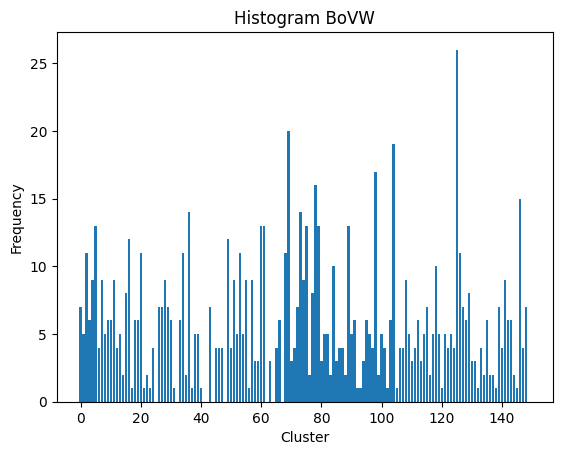

In [5]:
# Gunakan K-Means untuk Melakukan perhitungan Histogram (BoVW)
from scipy.cluster.vq import kmeans, vq
k = 150  
# Hitung histogram BoVW untuk seluruh dataset gambar
voc, variance = kmeans(descriptors_float, k, 1) 
im_features = np.zeros((len(image_paths), k), "float32")
for i in range(len(image_paths)):
    words, distance = vq(des_list[i][1],voc)
    for w in words:
        im_features[i][w] += 1
        
        
import matplotlib.pyplot as plt
# Anda sudah memiliki 'im_features' yang berisi histogram BoVW

# Misalnya, jika Anda ingin menampilkan histogram untuk gambar ke-0:
histogram = im_features[0]

# Plot histogram BoVW
plt.figure()
plt.bar(range(len(histogram)), histogram)
plt.xlabel("Cluster")
plt.ylabel("Frequency")
plt.title("Histogram BoVW")
plt.show()


In [6]:
X_train, X_test, y_train, y_test = train_test_split(im_features, image_classes, test_size=0.24, random_state=42, stratify=image_classes)

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import pickle
clf = SVC(kernel='linear', C=1.0, max_iter=500)
clf.fit(X_train, np.array(y_train))

# Lakukan prediksi pada data uji
y_pred = clf.predict(X_test)
# Mencetak laporan klasifikasi
report = classification_report(y_test, y_pred)
print(report)

#Simpan Model Sistem Klasifikasi kedalam bentuk Pickel
filename = "svm_model_SIFT.pkl"
with open(filename, "wb") as f:
    pickle.dump(clf, f)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred = knn.predict(X_test)
# Mencetak laporan klasifikasi
report = classification_report(y_test, y_pred)
print(report)

#Simpan Model Sistem Klasifikasi kedalam bentuk Pickel
filename = "knn_model_SIFT.pkl"
with open(filename, "wb") as f:
    pickle.dump(knn, f)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1
           2       1.00      1.00      1.00         1

    accuracy                           0.67         3
   macro avg       0.50      0.67      0.56         3
weighted avg       0.50      0.67      0.56         3



C:\Users\Reza\miniconda3\envs\LatihanCV\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Reza\miniconda3\envs\LatihanCV\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Reza\miniconda3\envs\LatihanCV\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
[[0 1 0]
 [0 1 0]
 [0 0 1]]


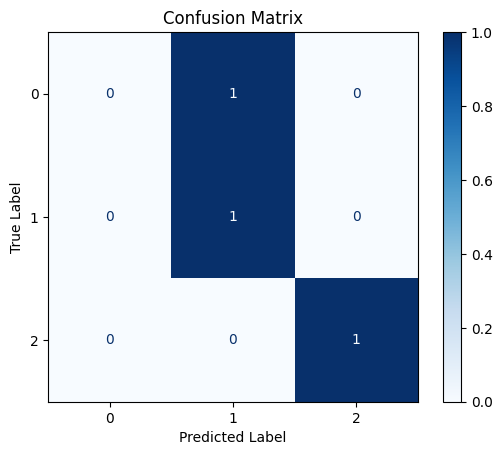

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Mencetak confusion matrix
print("Confusion Matrix:")
print(cm)

# Memplot confusion matrix
labels = np.unique(image_classes)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
display.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Confusion Matrix:
[[0 1 0]
 [0 1 0]
 [0 0 1]]


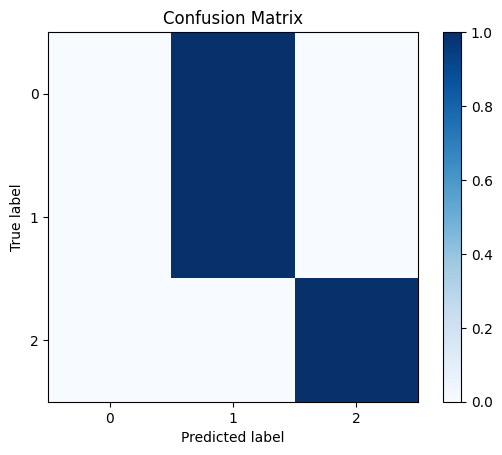

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
# Mencetak confusion matrix
print("Confusion Matrix:")

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Memplot confusion matrix
labels = np.unique(image_classes)
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=labels, yticklabels=labels,
       title="Confusion Matrix",
       ylabel="True label",
       xlabel="Predicted label")
plt.show()